In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/social-network-ads/Social_Network_Ads.csv


In [2]:
import pandas as pd #data preprocessing
import numpy as np #linear algebra
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('../input/social-network-ads/Social_Network_Ads.csv')

In [4]:
df.sample(5)

,Age,EstimatedSalary,Purchased
35,35,27000,0
310,42,70000,0
285,37,93000,1
187,33,41000,0
50,24,32000,0


*Here we can see the Age and EstimatedSalary feature are not standardized*

**0.1. Train Test Split** 


In [5]:
from sklearn.model_selection import train_test_split
X_train,  X_test, y_train, y_test =train_test_split(df.drop(['Purchased'],axis=1),df['Purchased'],test_size =0.3,random_state=0)
X_train.shape, y_test.shape

((280, 2), (120,))

**1. StandardScaler**

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#fit the scaler to the train set , it will learn the parameters
scaler.fit(X_train)

# transoforming the train and test sets

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [7]:
scaler.mean_
#numpy array

array([3.78642857e+01, 6.98071429e+04])

In [8]:
# converting a numpy array to a dataframe
X_train_scaled = pd.DataFrame(X_train_scaled , columns = X_train.columns)
X_test_scaled= pd.DataFrame(X_test_scaled,columns= X_test.columns)


*The property could hence be checked here mean =0, and the standard deviation =1*

In [9]:
np.round(X_train_scaled.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


In [10]:
np.round(X_train.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


**2. Effect of Scaling**

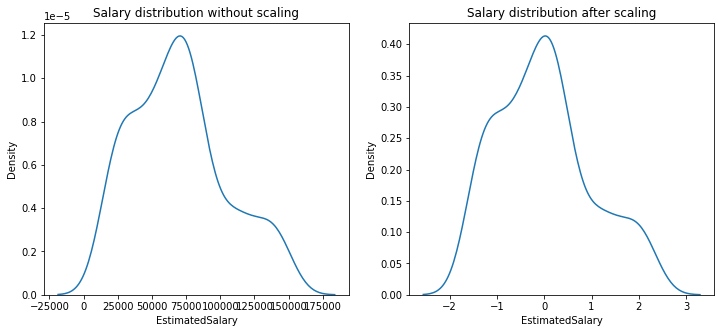

In [11]:
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize =(12,5))
#before scaling
ax1.set_title('Salary distribution without scaling')
sns.kdeplot(X_train['EstimatedSalary'],ax=ax1)

#after scaling
ax2.set_title('Salary distribution after scaling')
sns.kdeplot(X_train_scaled['EstimatedSalary'],ax=ax2)
plt.show()

**4. Why is scaling important?**

In [12]:
#The effect on accuracy after scaling in Logistic regression
from sklearn.linear_model import LogisticRegression

In [13]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()
#train the data
lr.fit(X_train,y_train)
lr_scaled.fit(X_train_scaled,y_train)

LogisticRegression()

In [14]:
#predicting the output
y_pred = lr.predict(X_test)
y_pred_scaled =lr_scaled.predict(X_test_scaled)


In [15]:
#Calculating the accuracy score
from sklearn.metrics import accuracy_score



In [16]:
print("Actual Accuracy:",accuracy_score(y_test,y_pred))


Actual Accuracy: 0.6583333333333333


In [17]:
print("After Scaling Accuracy:",accuracy_score(y_test,y_pred_scaled))

After Scaling Accuracy: 0.8666666666666667


In [18]:
# Effect on decision Trees
from sklearn.tree import DecisionTreeClassifier

dt =DecisionTreeClassifier()
dt_scaled =DecisionTreeClassifier()

#fit the data to training set
dt.fit(X_train,y_train)
dt_scaled.fit(X_train_scaled,y_train)

DecisionTreeClassifier()

In [19]:
#predict the output after fitting
y_pred = dt.predict(X_test)
y_pred_scaled =dt_scaled.predict(X_test_scaled)

In [20]:
#determining the accuracy score
print('Actual Accuracy',accuracy_score(y_pred,y_test))
print('After Scaling Accuracy',accuracy_score(y_pred_scaled,y_test))

Actual Accuracy 0.875
After Scaling Accuracy 0.875


*As you can see there is no change in accuracy in the decision trees*

**2. Effect of outliers**

In [21]:
#creating an outlier
df_outlier = df.append(pd.DataFrame({'Age':[5,90,99],"EstimatedSalary":[5,100000,800000],'Purchased':[1,1,1]}),ignore_index=True)

In [22]:
df_outlier

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
398,36,33000,0
399,49,36000,1
400,5,5,1
401,90,100000,1


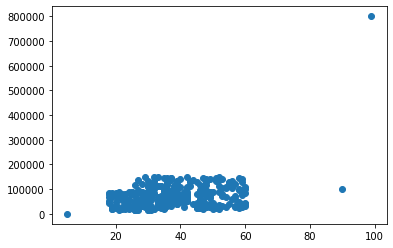

In [23]:
plt.scatter(df_outlier['Age'],df_outlier['EstimatedSalary'])

In [24]:
X_train,X_test,y_train,y_test = train_test_split(df_outlier.drop('Purchased',axis=1),df_outlier['Purchased'],test_size=0.3,random_state=0)
X_train.shape, X_test.shape

((282, 2), (121, 2))

In [25]:
#scaling the data
scaler = StandardScaler()
scaler.fit(X_train)

#transform the data: scaling on both training and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled =scaler.transform(X_test)


In [26]:
#convert numpy array to dataframe
X_train_scaled =pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled =pd.DataFrame(X_test_scaled,columns=X_test.columns)

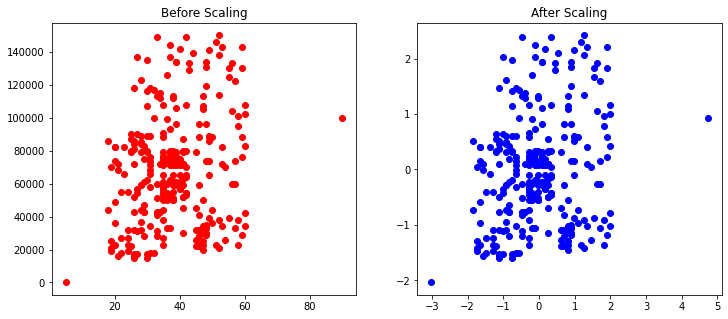

In [27]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
ax1.scatter(X_train['Age'],X_train['EstimatedSalary'],color='red')
ax1.set_title('Before Scaling')
ax2.scatter(X_train_scaled['Age'],X_train_scaled['EstimatedSalary'],color='blue')
ax2.set_title('After Scaling')
plt.show()

*As you can clearly observe there is not effect on outliers by standardization, outliers have to be handled seperatly*